Original FlexTok Paper
[`Website`](https://flextok.epfl.ch) | [`arXiv`](https://arxiv.org/abs/2502.13967) | [`GitHub`](https://github.com/apple/ml-flextok)

1️⃣ Clone the repo (contains FVD code & checkpoint)

`!git clone https://github.com/kerryzl77/video-tokenizer.git`

2️⃣ Key files now at:
-     video-tokenizer/FVD-UCF101/FVD/fvd.py
-    video-tokenizer/FVD-UCF101/FVD/pytorch_i3d.py
-     video-tokenizer/FVD-UCF101/FVD/i3d_pretrained_400.pt


### Download FlexTok

In [1]:
!pip install av

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 69.8 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/apple/ml-flextok.git

Cloning into 'ml-flextok'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 80 (delta 22), reused 74 (delta 17), pack-reused 0 (from 0)
Receiving objects: 100% (80/80), 11.95 MiB | 30.89 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [3]:
%cd ml-flextok

/content/ml-flextok


In [4]:
!pip install -e .

Obtaining file:///content/ml-flextok
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Download data for GPU Instance (Vast ai)

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          16G   11G  5.7G  65% /
tmpfs            64M     0   64M   0% /dev
shm              62G     0   62G   0% /dev/shm
/dev/nvme1n1p3  7.0T  2.9T  4.1T  42% /etc/hosts
/dev/nvme1n1p1   36G   28G  6.7G  81% /usr/bin/nvidia-smi
tmpfs           252G     0  252G   0% /sys/fs/cgroup
tmpfs           252G   12K  252G   1% /proc/driver/nvidia
tmpfs           252G  4.0K  252G   1% /etc/nvidia/nvidia-application-profiles-rc.d
tmpfs            51G  4.6M   51G   1% /run/nvidia-persistenced/socket
tmpfs           252G     0  252G   0% /proc/acpi
tmpfs           252G     0  252G   0% /proc/scsi
tmpfs           252G     0  252G   0% /sys/firmware
tmpfs           252G     0  252G   0% /sys/devices/virtual/powercap


In [ ]:
%%bash
# ---- fill in your THUMOS credentials ----
USER=YOUR_USERNAME
PASS=THUMOS14_REGISTERED

RAM_DIR=/dev/shm/ucf101          # lives in RAM; vanishes when job ends
mkdir -p "$RAM_DIR"
echo "Dataset will be stored in $RAM_DIR"

cd "$RAM_DIR"
ZIP=UCF101.zip
echo "Downloading UCF‑101…"
wget --progress=bar:force:noscroll --user "$USER" --password "$PASS" \
     --no-check-certificate -O "$ZIP" \
     https://www.crcv.ucf.edu/THUMOS14/UCF101/UCF101.zip

echo "Extracting (quiet)…"
unzip -q "$ZIP" -d "$RAM_DIR"

echo "Cleaning up zip…"
rm -f "$ZIP"

echo -n "Dataset size in RAM: "
du -sh "$RAM_DIR"


Dataset will be stored in /dev/shm/ucf101


--2025-05-07 16:57:31--  https://www.crcv.ucf.edu/THUMOS14/UCF101/UCF101.zip
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 6960400115 (6.5G) [application/zip]
Saving to: ‘UCF101.zip’

UCF101.zip          100%[===================>]   6.48G  20.3MB/s    in 5m 32s  

2025-05-07 17:03:04 (20.0 MB/s) - ‘UCF101.zip’ saved [6960400115/6960400115]



Extracting (quiet)…
Cleaning up zip…
Dataset size in RAM: 6.8G	/dev/shm/ucf101


### Download Data

In [2]:
%cd /content/

/content


In [3]:
!wget \
  --user=YOUR_USERNAME \
  --password=THUMOS14_REGISTERED \
  --no-check-certificate \
  "https://www.crcv.ucf.edu/THUMOS14/UCF101/UCF101.zip" \
  -O UCF101.zip

--2025-05-11 17:37:40--  https://www.crcv.ucf.edu/THUMOS14/UCF101/UCF101.zip
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 6960400115 (6.5G) [application/zip]
Saving to: ‘UCF101.zip’

UCF101.zip          100%[===================>]   6.48G  87.6MB/s    in 1m 40s  

2025-05-11 17:39:20 (66.4 MB/s) - ‘UCF101.zip’ saved [6960400115/6960400115]



In [4]:
!unzip -q UCF101.zip -d UCF101

In [5]:
# --- group UCF101 by action group ---------------------------------------------------------
import os, pathlib, shutil

ROOT   = pathlib.Path("/content/UCF101/UCF101")   # path to v_*.avi
# ROOT   = pathlib.Path("/dev/shm/ucf101/UCF101")   # Vast AI RAM
TARGET = ROOT.parent / "UCF101_grouped"           # ~/UCF101_grouped/*
TARGET.mkdir(exist_ok=True)

# ---------------------------------------------------------------------------
# 1.  hard‑coded mapping https://www.crcv.ucf.edu/data/UCF101.php
# ---------------------------------------------------------------------------
GROUP = {
    # 1) Human‑Object Interaction
    **{a: "Human_Object_Interaction" for a in [
        "ApplyEyeMakeup","ApplyLipstick","BlowDryHair","BrushingTeeth",
        "CuttingInKitchen","Hammering","HulaHoop","JugglingBalls","JumpRope",
        "Knitting","Mixing","MoppingFloor","Nunchucks","PizzaTossing",
        "ShavingBeard","SkateBoarding","SoccerJuggling","Typing","WritingOnBoard","YoYo"]},
    # 2) Body‑Motion Only
    **{a: "Body_Motion_Only" for a in [
        "BabyCrawling","BlowingCandles","BodyWeightSquats","HandstandPushups",
        "HandstandWalking","JumpingJack","Lunges","PullUps","PushUps",
        "RockClimbingIndoor","RopeClimbing","Swing","TaiChi","TrampolineJumping",
        "WalkingWithDog","WallPushups"]},
    # 3) Human‑Human Interaction
    **{a: "Human_Human_Interaction" for a in [
        "BandMarching","Haircut","HeadMassage","MilitaryParade","SalsaSpin"]},
    # 4) Playing Musical Instruments
    **{a: "Playing_Musical_Instruments" for a in [
        "Drumming","PlayingCello","PlayingDaf","PlayingDhol","PlayingFlute",
        "PlayingGuitar","PlayingPiano","PlayingSitar","PlayingTabla","PlayingViolin"]},
    # 5) Sports
    **{a: "Sports" for a in [
        "Archery","BalanceBeam","BaseballPitch","Basketball","BasketballDunk",
        "BenchPress","Biking","Billiards","Bowling","BoxingPunchingBag",
        "BoxingSpeedBag","BreastStroke","CleanAndJerk","CliffDiving","CricketBowling",
        "CricketShot","Diving","Fencing","FieldHockeyPenalty","FloorGymnastics",
        "FrisbeeCatch","FrontCrawl","GolfSwing","HammerThrow","HighJump","HorseRace",
        "HorseRiding","IceDancing","JavelinThrow","Kayaking","LongJump",
        "ParallelBars","PoleVault","PommelHorse","Punch","Rafting","Rowing",
        "Shotput","Skiing","Skijet","SkyDiving","SoccerPenalty","StillRings",
        "SumoWrestling","Surfing","TableTennisShot","TennisSwing","ThrowDiscus",
        "UnevenBars","VolleyballSpiking"]},
}

# ---------------------------------------------------------------------------
# 2.  create target folders once
# ---------------------------------------------------------------------------
for g in set(GROUP.values()):
    (TARGET / g).mkdir(exist_ok=True)

# ---------------------------------------------------------------------------
# 3.  walk every clip   v_ActionName_g##_c##.avi
# ---------------------------------------------------------------------------
for clip in ROOT.rglob("v_*_g*_c*.avi"):
    action = clip.name.split("_", 2)[1]            # "PlayingGuitar" etc.
    group  = GROUP.get(action)
    if group is None:
        # print(f"[WARN] No group for {action}")
        continue
    link_path = TARGET / group / clip.name
    try:                       # use links – zero extra disk
        os.symlink(clip, link_path)
    except FileExistsError:
        pass  # already linked

print("Done ✓  – grouped symlinks live in", TARGET)

Done ✓  – grouped symlinks live in /content/UCF101/UCF101_grouped


### Load FlexTok Model

In [6]:
import numpy as np
from PIL import Image, ImageSequence
import matplotlib.pyplot as plt

import einops
import torch
import torchvision.transforms.functional as TF
import torchvision.transforms as T
import torch.nn.functional as F


from diffusers.models import AutoencoderKL

from flextok.utils.demo import imgs_from_urls, denormalize, batch_to_pil
from flextok.utils.misc import detect_bf16_support, get_bf16_context, get_generator

from pathlib import Path
import cv2
from collections import defaultdict
import imageio
from torchvision.io import read_video

In [7]:
from flextok.flextok_wrapper import FlexTokFromHub
print("FlexTok module imported successfully!")

FlexTok module imported successfully!


In [8]:
# Switch path to root of project
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
current_folder = globals()['_dh'][0]
os.chdir(os.path.dirname(os.path.abspath(current_folder)))

%load_ext autoreload
%autoreload 2

In [9]:
# The flag below controls whether to allow TF32 on matmul. This flag defaults to False in PyTorch 1.12 and later.
torch.backends.cuda.matmul.allow_tf32 = True
# The flag below controls whether to allow TF32 on cuDNN. This flag defaults to True.
torch.backends.cudnn.allow_tf32 = True

# Global no_grad
torch.set_grad_enabled(False)

# Automatically set device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device:', device)

# Detect if bf16 is enabled or not
enable_bf16 = detect_bf16_support()
print('BF16 enabled:', enable_bf16)

Device: cuda
BF16 enabled: True


In [10]:
# Load a FlexTok d18-d28 model trained on DFN from HuggingFace Hub
flextok = FlexTokFromHub.from_pretrained('EPFL-VILAB/flextok_d18_d28_dfn').to(device).eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/12.1k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/10.2G [00:00<?, ?B/s]

In [ ]:
# flextok

In [11]:
# — your FlexTok & FVD helpers must already be imported:
# from flextok_hub    import FlexTokFromHub, get_bf16_context
# from fvd            import get_fvd_logits, frechet_distance
# from pytorch_i3d    import InceptionI3d

DEVICE           = torch.device("cuda" if torch.cuda.is_available() else "cpu")
TOKENS_PER_FRAME = 256
# ROOT_GROUPED     = Path("/dev/shm/ucf101/UCF101_grouped")
ROOT_GROUPED     = Path("/content/UCF101/UCF101_grouped")
assert ROOT_GROUPED.exists(), f"{ROOT_GROUPED} not found"
print("✔ Setup complete. Device:", DEVICE)


✔ Setup complete. Device: cuda


In [12]:
# action → (video_path, group_name)
video_paths    = {}
action_to_grp  = {}

for grp_dir in ROOT_GROUPED.iterdir():
    if not grp_dir.is_dir(): continue
    group_name = grp_dir.name
    for avi in sorted(grp_dir.glob("v_*_g*_c*.avi")):
        action = avi.name.split("_",2)[1]   # e.g. “PlayingGuitar”
        if action not in video_paths:
            video_paths[action]   = avi
            action_to_grp[action] = group_name

print("Collected actions:", len(video_paths))
assert len(video_paths)==101, "Expected 101 actions"


Collected actions: 101


In [13]:
def load_first_16(avi_path, size=(256,256), n_frames=16):
    video, _, _ = read_video(str(avi_path), pts_unit="pts")      # [T,H,W,3] uint8
    frames = video.permute(0,3,1,2).float().div(255.0)           # [T,3,H,W] float
    if frames.size(0) < n_frames:
        return None
    frames = frames[:n_frames]
    # resize each to 256×256
    return torch.stack([TF.resize(f, size) for f in frames])    # [16,3,256,256]

# Quick smoke test
sample_vid = load_first_16(next(iter(video_paths.values())))
print("Sample vid shape:", sample_vid.shape)  # → [16,3,256,256]


/usr/local/lib/python3.11/dist-packages/torchvision/io/video.py:197: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


Sample vid shape: torch.Size([16, 3, 256, 256])


In [14]:
real_clips = {}
for action, p in video_paths.items():
    vid = load_first_16(p)
    if vid is None:
        raise RuntimeError(f"{action} too short (<16 frames)")
    real_clips[action] = vid

print("Real clips ready:", len(real_clips))  # → 101


Real clips ready: 101


In [ ]:
all_recon = {}

for action, vid in real_clips.items():
    # 5.1 tokenize each frame
    toks = []
    with get_bf16_context(True):
        for frame in vid:  # [3,256,256]
            t = flextok.tokenize(frame.unsqueeze(0).to(DEVICE))[0]
            toks.append(t[:, :TOKENS_PER_FRAME])
    # 5.2 detokenize back into images
    reconst = torch.stack([
        flextok.detokenize(
            [t], timesteps=20, guidance_scale=7.5,
            perform_norm_guidance=True, verbose=False
        )[0].cpu()
        for t in toks
    ])  # [16,3,256,256]

    all_recon[action] = reconst
    torch.cuda.empty_cache()

print("Reconstructions done:", len(all_recon))  # → 101


Reconstructions done: 101


### Autoencoding using 256 tokens

In [16]:
actions     = list(real_clips.keys())
grp_idxs = defaultdict(list)
for idx, action in enumerate(actions):
    grp_idxs[action_to_grp[action]].append(idx)

In [ ]:
from fvd          import get_fvd_logits, frechet_distance
from pytorch_i3d  import InceptionI3d
# 6.1  assemble batches [N,C,T,H,W]
actions     = list(real_clips.keys())
real_batch  = torch.stack([ real_clips[a].permute(1,0,2,3) for a in actions ])
recon_batch = torch.stack([ all_recon[a].permute(1,0,2,3) for a in actions ])

# 6.2  load I3D backbone (if not already done)
i3d = InceptionI3d(400, in_channels=3).eval().to(DEVICE)
i3d.load_state_dict(torch.load(
    "/Z-FVD/i3d_pretrained_400.pt", map_location=DEVICE
))
i3d = torch.nn.DataParallel(i3d)

# 6.3  get embeddings
with torch.no_grad():
    emb_real = get_fvd_logits(real_batch.to("cpu"),  i3d, "cpu")
    emb_fake = get_fvd_logits(recon_batch.to("cpu"), i3d, "cpu")

# 6.4  overall FVD
fvd_total = frechet_distance(emb_fake, emb_real)
print(f"Overall FVD (101 vids): {fvd_total:.2f}")

# 6.5  per‑group FVD
grp_idxs = defaultdict(list)
for idx, action in enumerate(actions):
    grp_idxs[action_to_grp[action]].append(idx)

for grp, idxs in grp_idxs.items():
    fe = emb_fake[idxs]
    re = emb_real[idxs]
    score = frechet_distance(fe, re)
    print(f"{grp:25s} → FVD {score:.2f}")


Overall FVD (101 vids): 28.11
Playing_Musical_Instruments → FVD 35.94
Sports                    → FVD 23.88
Human_Object_Interaction  → FVD 27.42
Body_Motion_Only          → FVD 25.26
Human_Human_Interaction   → FVD 41.81


In [20]:
import os, logging, torch, imageio, numpy as np
from pathlib import Path
from IPython.display import Video, display

# suppress imageio warnings
logging.getLogger("imageio").setLevel(logging.ERROR)

def display_result_mp4(tokens_per_frame: int,
                       out_dir: str = None,
                       device: torch.device = DEVICE):
    """
    For each of the 5 groups in grp_idxs, take the first real clip,
    tokenize & detokenize each frame with `tokens_per_frame` tokens,
    write an H.264 MP4 to out_dir, and display it inline.
    """
    # build the out_dir based on tokens_per_frame if not provided
    if out_dir is None:
        out_dir = f"/content/UCF101/recon_{tokens_per_frame}"
    os.makedirs(out_dir, exist_ok=True)

    for grp, idxs in grp_idxs.items():
        action = actions[idxs[0]]            # pick first action
        real    = real_clips[action]         # [T,3,256,256] on CPU

        # move to GPU & add batch dim → [1,3,T,256,256]
        real = real.permute(1,0,2,3).unsqueeze(0).to(device)

        with torch.no_grad(), torch.autocast('cuda', dtype=torch.float16):
            # unpack → [T,3,256,256]
            frames_real = real.squeeze(0).permute(1,0,2,3)

            # 1) tokenize
            toks = []
            for frame in frames_real:
                t = flextok.tokenize(frame.unsqueeze(0))[0]
                toks.append(t[:, :tokens_per_frame])

            # 2) detokenize on GPU → [T,3,256,256]
            recon = torch.stack([
                flextok.detokenize(
                    [t],
                    timesteps=20,
                    guidance_scale=7.5,
                    perform_norm_guidance=True,
                    verbose=False
                )[0]
                for t in toks
            ]).cpu()

        torch.cuda.empty_cache()

        # 3) scale to 0–255 & convert to uint8
        uint8_recon = (recon.clamp(0,1) * 255).to(torch.uint8)

        # 4) permute to [T,H,W,C] numpy
        np_frames = uint8_recon.permute(0,2,3,1).numpy()

        # 5) write MP4
        mp4_path = os.path.join(out_dir, f"{tokens_per_frame}tok_{grp}.mp4")
        with imageio.get_writer(mp4_path, fps=4, codec="libx264") as writer:
            for f in np_frames:
                writer.append_data(f)

        # 6) display inline
        print(f"▶ {grp}")
        display(Video(mp4_path, embed=True))


▶ Playing_Musical_Instruments


▶ Human_Human_Interaction


▶ Human_Object_Interaction


▶ Sports


▶ Body_Motion_Only


### Autoencoding using 16 tokens

In [ ]:
# 1) override token count
TOKENS_PER_FRAME = 16

# 2) re‑tokenize & detokenize → all_recon_TK16, with simple checkpoints
all_recon_TK16 = {}
total_actions = len(real_clips)
for i, (action, vid) in enumerate(real_clips.items(), start=1):
    if i == 1 or i % 10 == 0:
        print(f"[{i}/{total_actions}] Processing action `{action}`")
    toks = []
    with get_bf16_context(True):
        for frame in vid:  # [3,256,256]
            t = flextok.tokenize(frame.unsqueeze(0).to(DEVICE))[0]
            toks.append(t[:, :TOKENS_PER_FRAME])
    reconst = torch.stack([
        flextok.detokenize(
            [t], timesteps=20,
            guidance_scale=7.5,
            perform_norm_guidance=True,
            verbose=False
        )[0].cpu()
        for t in toks
    ])  # [16,3,256,256]
    all_recon_TK16[action] = reconst
    torch.cuda.empty_cache()

# 3) build recon_batch_TK16 [N, C, T, H, W]
recon_batch_TK16 = torch.stack([
    all_recon_TK16[a].permute(1,0,2,3) for a in actions
])

# 4) compute fake embeddings for TK16
with torch.no_grad():
    emb_fake_TK16 = get_fvd_logits(recon_batch_TK16.to("cpu"), i3d, "cpu")

# 5) overall FVD_TK16
fvd_TK16 = frechet_distance(emb_fake_TK16, emb_real)
print(f"\nOverall FVD (16 tokens/frame): {fvd_TK16:.2f}")

# 6) per‑group FVD_TK16
for grp, idxs in grp_idxs.items():
    score = frechet_distance(emb_fake_TK16[idxs], emb_real[idxs])
    print(f"{grp:25s} → FVD_TK16 {score:.2f}")


[1/101] Processing action `Drumming`
[10/101] Processing action `PlayingViolin`
[20/101] Processing action `BoxingPunchingBag`
[30/101] Processing action `FloorGymnastics`
[40/101] Processing action `Kayaking`
[50/101] Processing action `Skijet`
[60/101] Processing action `VolleyballSpiking`
[70/101] Processing action `Knitting`
[80/101] Processing action `YoYo`
[90/101] Processing action `RockClimbingIndoor`
[100/101] Processing action `MilitaryParade`

Overall FVD (16 tokens/frame): 78.94
Playing_Musical_Instruments → FVD_TK16 34.69
Sports                    → FVD_TK16 27.25
Human_Object_Interaction  → FVD_TK16 31.09
Body_Motion_Only          → FVD_TK16 26.87
Human_Human_Interaction   → FVD_TK16 44.01


In [23]:
display_result_mp4(16)

▶ Playing_Musical_Instruments


▶ Human_Human_Interaction


▶ Human_Object_Interaction


▶ Sports


▶ Body_Motion_Only


### Autoencoding using 64 tokens

In [ ]:
# 1) override token count
TOKENS_PER_FRAME = 64

# 2) re‑tokenize & detokenize → all_recon_TK64, with simple checkpoints
all_recon_TK64 = {}
total_actions = len(real_clips)
for i, (action, vid) in enumerate(real_clips.items(), start=1):
    if i == 1 or i % 10 == 0:
        print(f"[{i}/{total_actions}] Processing action `{action}`")
    toks = []
    with get_bf16_context(True):
        for frame in vid:  # [3,256,256]
            t = flextok.tokenize(frame.unsqueeze(0).to(DEVICE))[0]
            toks.append(t[:, :TOKENS_PER_FRAME])
    reconst = torch.stack([
        flextok.detokenize(
            [t], timesteps=20,
            guidance_scale=7.5,
            perform_norm_guidance=True,
            verbose=False
        )[0].cpu()
        for t in toks
    ]) # reconst.shape == [16, 3, 256, 256]  # 16 frames x 3 channels x 256×256
    all_recon_TK64[action] = reconst
    torch.cuda.empty_cache()

# 3) build recon_batch_TK64 [N, C, T, H, W]
recon_batch_TK64 = torch.stack([
    all_recon_TK64[a].permute(1,0,2,3) for a in actions
])

# 4) compute fake embeddings for TK64
with torch.no_grad():
    emb_fake_TK64 = get_fvd_logits(recon_batch_TK64.to("cpu"), i3d, "cpu")

# 5) overall FVD_TK64
fvd_TK64 = frechet_distance(emb_fake_TK64, emb_real)
print(f"\nOverall FVD (64 tokens/frame): {fvd_TK64:.2f}")

# 6) per‑group FVD_TK64
for grp, idxs in grp_idxs.items():
    score = frechet_distance(emb_fake_TK64[idxs], emb_real[idxs])
    print(f"{grp:25s} → FVD_TK64 {score:.2f}")


[1/101] Processing action `Drumming`
[10/101] Processing action `PlayingViolin`
[20/101] Processing action `BoxingPunchingBag`
[30/101] Processing action `FloorGymnastics`
[40/101] Processing action `Kayaking`
[50/101] Processing action `Skijet`
[60/101] Processing action `VolleyballSpiking`
[70/101] Processing action `Knitting`
[80/101] Processing action `YoYo`
[90/101] Processing action `RockClimbingIndoor`
[100/101] Processing action `MilitaryParade`

Overall FVD (64 tokens/frame): 87.92
Playing_Musical_Instruments → FVD_TK64 36.37
Sports                    → FVD_TK64 25.80
Human_Object_Interaction  → FVD_TK64 30.41
Body_Motion_Only          → FVD_TK64 25.89
Human_Human_Interaction   → FVD_TK64 45.23


In [22]:
display_result_mp4(64)

▶ Playing_Musical_Instruments


▶ Human_Human_Interaction


▶ Human_Object_Interaction


▶ Sports


▶ Body_Motion_Only


### Plot FVD Result

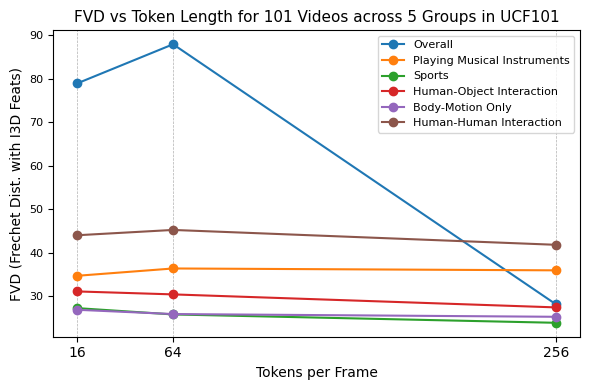

In [ ]:
# Data
tokens = [16, 64, 256]
fvd_data = {
    'Overall':                    [78.94, 87.92, 28.11],
    'Playing Musical Instruments': [34.69, 36.37, 35.94],
    'Sports':                     [27.25, 25.80, 23.88],
    'Human-Object Interaction':   [31.09, 30.41, 27.42],
    'Body-Motion Only':           [26.87, 25.89, 25.26],
    'Human-Human Interaction':    [44.01, 45.23, 41.81],
}

# Create the plot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot lines and annotate each point
for label, values in fvd_data.items():
    lw = 1.5
    ax.plot(tokens, values, marker='o', linewidth=lw, label=label)

# Axis formatting
ax.set_xlabel('Tokens per Frame', fontsize=10)
ax.set_ylabel('FVD (Frechet Dist. with I3D Feats)', fontsize=10)
ax.set_xticks(tokens)
ax.set_xticklabels([str(t) for t in tokens], fontsize=10)
ax.tick_params(axis='y', labelsize=8)

ax.set_title('FVD vs Token Length for 101 Videos across 5 Groups in UCF101', fontsize=11)


# Grid and legend
ax.grid(axis='x', linestyle='--', linewidth=0.5)
ax.legend(fontsize=8, loc='upper right', ncol=1)

plt.tight_layout()
plt.show()
